# Feature Selection Comparison
By: Prajwal Brijesh Ainapur

This notebook contains the work done on analyzing various feature selection procedures on the telemarketing dataset

In [1]:
#Importing Libraries
from collections import Counter
from imblearn.combine import SMOTEENN
from pycaret import classification, clustering
from pycaret.classification import *
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn import metrics

import seaborn as sns
import pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/prajwal_brijesh_ainapur/upgradSubmissions/MS_PGM/bank-additional/bank-additional-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


As per the dataset description, the duration column is added only after the call is made with the customer and thus, this information is not available well in advance. Thus we proceed to remove this column in order to create a realistic prediction model.

In [4]:
df = df.drop(columns = ['duration'], axis = 1)
df.shape

(41188, 20)

In [5]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(41188, 20)
(39404, 20)


In [6]:
def trainPredict(_Xd, _y):

#     _Xd, _y = tmp().fit_resample(X_train, y_train)
#     print(y_train.shape)
#     counter = Counter(_y)
#     print(counter)
    
    df_tmp = pd.concat([_Xd, _y], axis = 1)
    classification_setup = classification.setup(data= df_tmp, target='y', fix_imbalance = False)
    lgbms = create_model('lightgbm', learning_rate = 0.3)
    print(counter)
    return lgbms


def plotModel(tmp):    
    lgbms_final = finalize_model(tmp)

    y_pred = predict_model(lgbms_final, data = X_test)

    cmat = confusion_matrix(y_test, y_pred.Label)
    print(cmat)
    trec = recall_score(y_test, y_pred.Label)
    print(trec)
#     sns.heatmap(cmat, annot = True)
    plt.show()

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred.Label)

    roc_auc = (metrics.auc(fpr, tpr))

    plt.title('Receiver Operating Characteristic' )
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [7]:
X = df.drop(columns = ['y'], axis = 1)
y = df['y']

Xd = pd.get_dummies(X, drop_first = True)
Xd.shape

(39404, 52)

In [8]:
y = y.replace('no', 0)
y = y.replace('yes', 1)
counter = Counter(y)
print(counter)

Counter({0: 34806, 1: 4598})


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xd, y, stratify=y, test_size=0.25)

In [40]:
X_train, y_train = SMOTEENN().fit_resample(X_train, y_train)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40886 entries, 0 to 40885
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            40886 non-null  int64  
 1   campaign                       40886 non-null  int64  
 2   pdays                          40886 non-null  int64  
 3   previous                       40886 non-null  int64  
 4   emp.var.rate                   40886 non-null  float64
 5   cons.price.idx                 40886 non-null  float64
 6   cons.conf.idx                  40886 non-null  float64
 7   euribor3m                      40886 non-null  float64
 8   nr.employed                    40886 non-null  float64
 9   job_blue-collar                40886 non-null  uint8  
 10  job_entrepreneur               40886 non-null  uint8  
 11  job_housemaid                  40886 non-null  uint8  
 12  job_management                 40886 non-null 

In [29]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
# X_train2 = X_train1.copy()
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [31]:
selected_feat1 = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))
print(selected_feat1)

total features: 52
selected features: 11
features with coefficients shrank to zero: 0
Index(['campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'contact_telephone', 'month_aug',
       'month_jun', 'month_mar', 'month_may', 'poutcome_nonexistent'],
      dtype='object')


In [14]:
model = trainPredict(X_train[selected_feat], y_train)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8888,0.7816,0.2798,0.5528,0.3716,0.3177,0.3400
1,0.8942,0.7923,0.2634,0.6154,0.3689,0.3211,0.3558
2,0.8932,0.7682,0.2798,0.5965,0.3810,0.3308,0.3593
3,0.8922,0.7796,0.3169,0.5746,0.4085,0.3546,0.3737
4,0.9019,0.8117,0.3115,0.6847,0.4282,0.3826,0.4184
5,0.8879,0.7779,0.2295,0.5600,0.3256,0.2759,0.3089
6,0.8913,0.7849,0.2828,0.5798,0.3802,0.3282,0.3538
7,0.8907,0.7870,0.2757,0.5726,0.3722,0.3203,0.3461
8,0.8873,0.7724,0.2346,0.5481,0.3285,0.2777,0.3077
9,0.8994,0.8010,0.2510,0.7011,0.3697,0.3281,0.3798


Counter({0: 34806, 1: 4598})


[[8491  211]
 [ 822  327]]
0.2845953002610966


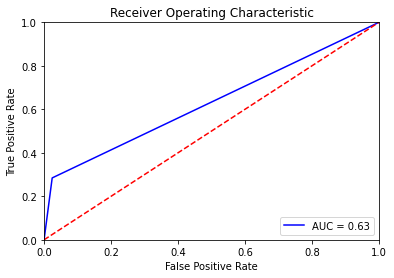

In [15]:
plotModel(model)

In [32]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train.fillna(0))

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver = 'saga'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='saga',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [34]:
selected_feat2 = X_train.columns[(sel_.estimator_.coef_ >= 0.01).ravel().tolist()]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat2)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ > 0.01)))
print(selected_feat2)

total features: 52
selected features: 24
features with coefficients shrank to zero: 24
Index(['age', 'cons.price.idx', 'cons.conf.idx', 'job_retired',
       'job_self-employed', 'job_student', 'job_technician', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_aug', 'month_dec', 'month_jul', 'month_mar', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


In [18]:
model = trainPredict(X_train[selected_feat], y_train)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8932,0.7655,0.2636,0.5833,0.3631,0.3138,0.3435
1,0.8903,0.7780,0.2971,0.5462,0.3848,0.3303,0.3488
2,0.8956,0.7186,0.2427,0.6237,0.3494,0.3044,0.3449
3,0.8840,0.7467,0.2427,0.4957,0.3258,0.2704,0.2912
4,0.8922,0.7785,0.2542,0.5810,0.3536,0.3045,0.3357
5,0.8908,0.7632,0.2375,0.5700,0.3353,0.2866,0.3195
6,0.8971,0.7802,0.3333,0.6015,0.4290,0.3775,0.3974
7,0.8926,0.7939,0.2720,0.5752,0.3693,0.3188,0.3457
8,0.8946,0.7615,0.2971,0.5868,0.3944,0.3434,0.3674
9,0.8985,0.7789,0.3054,0.6239,0.4101,0.3616,0.3894


Counter({0: 34806, 1: 4598})


[[8480  222]
 [ 867  282]]
0.2454308093994778


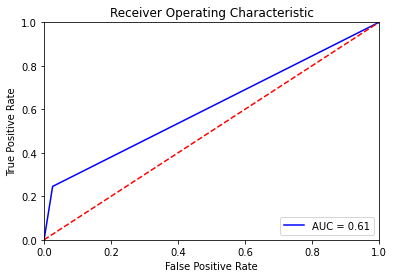

In [19]:
plotModel(model)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)
# fit the model
rfe.fit(Xd, y)
# transform the data


RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [27]:
df = pd.DataFrame([Xd. columns, rfe.support_, rfe.ranking_]).transpose()
df.columns = ['feature', 'support', 'ranking']
df.sort_values('ranking')

,feature,support,ranking
51,poutcome_success,True,1
38,month_dec,True,1
41,month_mar,True,1
44,month_oct,False,2
42,month_may,False,3
7,euribor3m,False,4
50,poutcome_nonexistent,False,5
16,job_student,False,6
13,job_retired,False,7
30,default_unknown,False,8


In [36]:
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import RandomForestClassfier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
clf.feature_importances_     

array([1.57723697e-01, 1.04777296e-01, 3.73071790e-02, 1.40892402e-02,
       2.01845864e-02, 1.29444960e-02, 1.65934779e-02, 1.13748949e-01,
       4.17853984e-02, 1.32557725e-02, 7.11370106e-03, 5.58584101e-03,
       1.14259027e-02, 9.65750450e-03, 7.20393352e-03, 9.75324603e-03,
       6.65823925e-03, 1.82284800e-02, 6.96998704e-03, 3.05936150e-03,
       2.20283483e-02, 1.76412118e-02, 8.32513814e-04, 7.48037087e-03,
       1.25151090e-02, 1.66760356e-02, 2.03556462e-04, 1.25814933e-02,
       1.72724265e-02, 7.73254016e-03, 1.51046247e-02, 2.00776580e-06,
       3.49359532e-03, 4.36606831e-02, 3.51342680e-03, 2.73683156e-02,
       1.58609181e-02, 2.91501041e-03, 1.37134872e-03, 3.43243620e-03,
       3.23864303e-03, 5.98969417e-03, 1.16595765e-02, 3.88367348e-03,
       7.97989979e-03, 4.99042516e-03, 1.66067249e-02, 1.70224197e-02,
       1.70737560e-02, 1.63961247e-02, 1.40428080e-02, 3.13639926e-02])

In [37]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape   

(29553, 10)

In [38]:
selected_feat3 = X_train.columns[(model.get_support())]
selected_feat3

Index(['age', 'campaign', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed',
       'marital_married', 'housing_yes', 'loan_yes', 'poutcome_success'],
      dtype='object')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8840,0.7610,0.2231,0.5094,0.3103,0.2574,0.2838
1,0.8826,0.7723,0.2397,0.4957,0.3231,0.2673,0.2885
2,0.8879,0.7742,0.2397,0.5472,0.3333,0.2822,0.3111
3,0.8821,0.7334,0.2314,0.4912,0.3146,0.2591,0.2812
4,0.8927,0.7641,0.2686,0.5909,0.3693,0.3196,0.3495
5,0.8850,0.7610,0.2355,0.5182,0.3239,0.2705,0.2958
6,0.8908,0.7647,0.2881,0.5691,0.3825,0.3296,0.3527
7,0.8878,0.7722,0.2355,0.5481,0.3295,0.2787,0.3086
8,0.8873,0.7766,0.2273,0.5446,0.3207,0.2704,0.3014
9,0.8960,0.7650,0.2727,0.6286,0.3804,0.3332,0.3681


Counter({0: 34806, 1: 4598})
[[8480  222]
 [ 861  288]]
0.2506527415143603


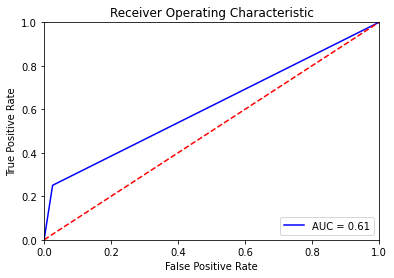

In [27]:
model = trainPredict(X_train[selected_feat], y_train)

plotModel(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9019,0.7945,0.2845,0.6800,0.4012,0.3574,0.3980
1,0.8937,0.7860,0.2678,0.5872,0.3678,0.3185,0.3480
2,0.8966,0.7953,0.2845,0.6126,0.3886,0.3402,0.3703
3,0.8888,0.7809,0.2218,0.5464,0.3155,0.2666,0.2990
4,0.8980,0.7602,0.2678,0.6400,0.3776,0.3321,0.3698
5,0.8869,0.7976,0.2708,0.5242,0.3571,0.3020,0.3219
6,0.8951,0.7738,0.2375,0.6264,0.3444,0.2997,0.3419
7,0.8989,0.8079,0.2803,0.6442,0.3907,0.3447,0.3805
8,0.8868,0.7855,0.2510,0.5217,0.3390,0.2853,0.3083
9,0.8931,0.7728,0.2720,0.5804,0.3704,0.3202,0.3479


Counter({0: 34806, 1: 4598})
[[8519  183]
 [ 840  309]]
0.2689295039164491


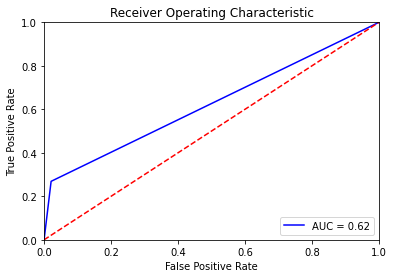

In [28]:
selected_feat = ['default_yes', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success', 
                'job_student', 'job_retired', 'marital_unknown', 'education_basic.9y', 'education_basic.6y', 
                'cons.price.idx', 'campaign']

model = trainPredict(X_train[selected_feat], y_train)

plotModel(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8106,0.8979,0.8156,0.8692,0.8416,0.6066,0.6085
1,0.7937,0.8879,0.7979,0.8577,0.8267,0.5725,0.5748
2,0.7933,0.8845,0.7911,0.8625,0.8252,0.5735,0.5767
3,0.8155,0.9003,0.8128,0.8790,0.8446,0.6184,0.6213
4,0.8053,0.8937,0.8259,0.8537,0.8396,0.5921,0.5926
5,0.7961,0.8876,0.8099,0.8523,0.8306,0.5751,0.5763
6,0.7908,0.8848,0.7831,0.8651,0.8220,0.5699,0.5741
7,0.7883,0.8762,0.7887,0.8567,0.8213,0.5628,0.5657
8,0.8013,0.8934,0.8013,0.8666,0.8326,0.5892,0.5919
9,0.7897,0.8870,0.7768,0.8685,0.8201,0.5689,0.5741


Counter({0: 34806, 1: 4598})
[[5935 2767]
 [ 335  814]]
0.7084421235857267


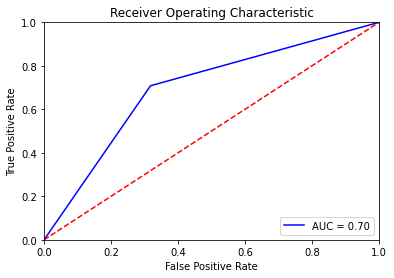

In [41]:
model = trainPredict(X_train[selected_feat], y_train)

plotModel(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8923,0.9460,0.8586,0.9622,0.9074,0.7795,0.7868
1,0.8891,0.9483,0.8551,0.9601,0.9046,0.7732,0.7806
2,0.9067,0.9584,0.8786,0.9666,0.9205,0.8082,0.8136
3,0.8972,0.9548,0.8746,0.9544,0.9127,0.7882,0.7927
4,0.8965,0.9549,0.8608,0.9672,0.9109,0.7884,0.7960
5,0.9018,0.9592,0.8751,0.9616,0.9163,0.7980,0.8032
6,0.8968,0.9551,0.8666,0.9619,0.9117,0.7884,0.7947
7,0.8964,0.9520,0.8671,0.9607,0.9115,0.7875,0.7935
8,0.8943,0.9484,0.8574,0.9671,0.9089,0.7842,0.7922
9,0.8848,0.9496,0.8505,0.9574,0.9008,0.7646,0.7723


Counter({0: 34806, 1: 4598})
[[7475 1227]
 [ 420  729]]
0.6344647519582245


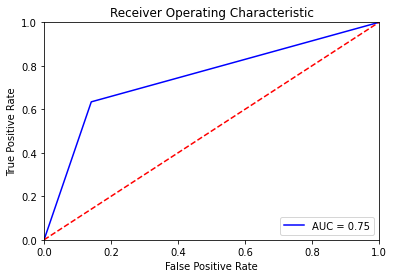

In [42]:
model = trainPredict(X_train[selected_feat1], y_train)

plotModel(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8732,0.9494,0.8996,0.8955,0.8976,0.7313,0.7314
1,0.8817,0.9534,0.9025,0.9056,0.9040,0.7499,0.7499
2,0.8926,0.9561,0.9013,0.9229,0.9120,0.7743,0.7747
3,0.8789,0.9497,0.8945,0.9079,0.9011,0.7448,0.7449
4,0.8986,0.9588,0.9179,0.9179,0.9179,0.7854,0.7854
5,0.8923,0.9534,0.9167,0.9095,0.9131,0.7714,0.7714
6,0.8835,0.9516,0.9002,0.9100,0.9051,0.7542,0.7542
7,0.8795,0.9517,0.8893,0.9132,0.9011,0.7471,0.7475
8,0.8760,0.9490,0.9018,0.8977,0.8998,0.7373,0.7373
9,0.8743,0.9493,0.9087,0.8899,0.8992,0.7322,0.7325


Counter({0: 34806, 1: 4598})
[[6457 2245]
 [ 390  759]]
0.660574412532637


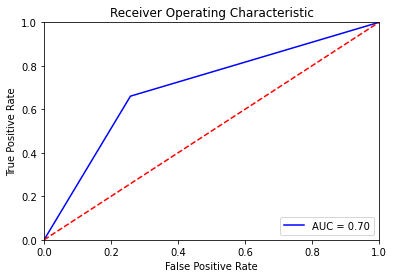

In [43]:
model = trainPredict(X_train[selected_feat2], y_train)

plotModel(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9158,0.9699,0.9013,0.9591,0.9293,0.8256,0.8280
1,0.9130,0.9649,0.8985,0.9572,0.9269,0.8198,0.8223
2,0.9137,0.9659,0.9025,0.9545,0.9277,0.8209,0.8229
3,0.9201,0.9679,0.9030,0.9645,0.9327,0.8345,0.8373
4,0.9155,0.9661,0.9065,0.9535,0.9294,0.8243,0.8260
5,0.9155,0.9660,0.8990,0.9608,0.9289,0.8251,0.8278
6,0.9155,0.9664,0.9002,0.9596,0.9290,0.8250,0.8275
7,0.9165,0.9669,0.9059,0.9558,0.9302,0.8266,0.8284
8,0.9162,0.9651,0.9111,0.9503,0.9303,0.8253,0.8264
9,0.9095,0.9657,0.8898,0.9598,0.9234,0.8131,0.8166


Counter({0: 34806, 1: 4598})
[[7355 1347]
 [ 405  744]]
0.6475195822454308


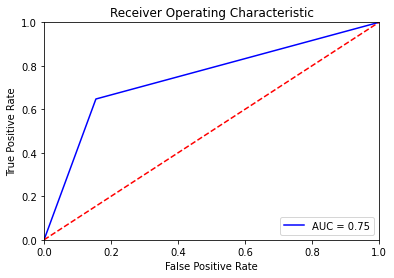

In [44]:
model = trainPredict(X_train[selected_feat3], y_train)

plotModel(model)